# Beispielaufgabe 1

In [2]:
import pandas
data=pandas.read_csv('C:\\Users\guehring\Documents\Vorlesungen\SoSe_2021\Labor_Statistik\einf_b1.txt', 
                     sep=' ', 
                     na_values='.', 
                     header=None, 
                     decimal=',',
                     names=['Nr.','Punkte', 'Note'])
data

,Nr.,Punkte,Note
0,1,110,1.0
1,2,90,1.7
2,3,108,1.0
3,4,95,1.3
4,5,80,2.3
5,6,74,2.7
6,7,52,3.7
7,8,78,2.3
8,9,39,4.7
9,10,102,1.0


In [3]:
Noten_bin=[0,1.3,2.3,3.3,4.0,5.0]
Noten=['sehr gut','gut','befriedigend','ausreichend','mangelhaft']
Stud_noten=pandas.cut(data['Note'],Noten_bin,labels=Noten)
data['Schreibnoten']=Stud_noten
data

,Nr.,Punkte,Note,Schreibnoten
0,1,110,1.0,sehr gut
1,2,90,1.7,gut
2,3,108,1.0,sehr gut
3,4,95,1.3,sehr gut
4,5,80,2.3,gut
5,6,74,2.7,befriedigend
6,7,52,3.7,ausreichend
7,8,78,2.3,gut
8,9,39,4.7,mangelhaft
9,10,102,1.0,sehr gut


In [4]:
pandas.value_counts(data['Schreibnoten'],sort=False)

sehr gut        10
gut             20
befriedigend     9
ausreichend      2
mangelhaft       1
Name: Schreibnoten, dtype: int64

In [5]:
Hf=pandas.value_counts(data['Schreibnoten'],sort=False).rename_axis('Schulnoten').reset_index(name='Häufigkeit')

In [6]:
Total=Hf['Häufigkeit'].sum()
Hf.loc['Summe']=Hf['Häufigkeit'].sum()
Hf['rel. Häufigkeit in %']=Hf['Häufigkeit']/Total*100
Hf['rel. Häufigkeit in %']=Hf['rel. Häufigkeit in %'].map('{:,.0f}'.format)
Hf

,Schulnoten,Häufigkeit,rel. Häufigkeit in %
0,sehr gut,10,24
1,gut,20,48
2,befriedigend,9,21
3,ausreichend,2,5
4,mangelhaft,1,2
Summe,42,42,100


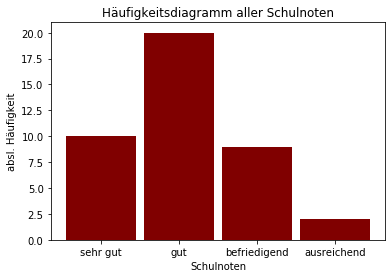

In [8]:
import matplotlib.pyplot as plt
plt.bar(Hf['Schulnoten'][0:4], Hf['Häufigkeit'][0:4],width=0.9,color='maroon')
plt.xlabel('Schulnoten')
plt.ylabel('absl. Häufigkeit')
plt.title('Häufigkeitsdiagramm aller Schulnoten')
plt.show()

g) Führen Sie in dem Diagramm die folgenden Umformatierungen durch:
    g1) Die Farbe der Säulen soll dunkelblau sein.
    g2) Jede Säule soll mit der zugehörigen Häufigkeit (wie oft gab es diese Note?) beschriftet sein.
    

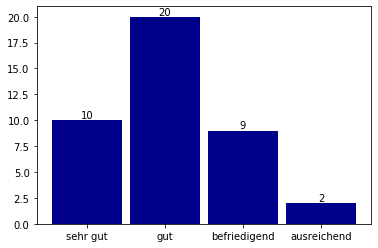

In [9]:
plt.bar(Hf['Schulnoten'][0:4], Hf['Häufigkeit'][0:4],width=0.9,color='darkblue')
for i in range(len(Hf['Häufigkeit'][0:4])):
    plt.annotate(str(Hf['Häufigkeit'][i]),xy=(Hf['Schulnoten'][i],Hf['Häufigkeit'][i]),
                 ha='center',va='bottom')
plt.show()   

Kennzahlen berechnen

h) Berechnen Sie Mittelwert, empirische Varianz und empirische Standardabweichung der Punktzahlen und geben Sie sie mit 4 Nachkommastellen an.

In [10]:
print('Mittelwert: %8.4f, Standardabweichung: %8.4f, Varianz: %8.4f'
     %(data['Punkte'].mean(), data['Punkte'].var(), data['Punkte'].std()))

Mittelwert:  82.2381, Standardabweichung: 250.2834, Varianz:  15.8203


i) Berechnen Sie Median und Spannweite der Punktzahlen, ohne die Punktzahlenliste zu sortieren (Spannweite=größter Datenwert minus kleinster Datenwert)

In [11]:
print('Median: %8.4f, Spannweite: %8.4f'
     %(data['Punkte'].median(), data['Punkte'].max()-data['Punkte'].min()))


Median:  83.5000, Spannweite:  71.0000


j) Speichern Sie die geänderte Datei *einf_daten.ipynb* in ihr persönliches Verzeichnis ab.